In [71]:
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['font.size'] = 14

## 3
### 3.3.1 Grafo em Anel    

In [80]:
N = 100
filename='./temp/lista4_3_2_1.png'
P = np.zeros([N, N])
for i in np.arange(N):
    for j in np.arange(N):
        if i == j:
            P[i][j] = 1/2
            continue
        elif i == j+1 or i == j-1:
            P[i][j] = 1/4
        elif i == N-1 and j == 0:
            P[i][j] = 1/4
        elif j == N-1 and i == 0:
            P[i][j] = 1/4
P

array([[0.5 , 0.25, 0.  , ..., 0.  , 0.  , 0.25],
       [0.25, 0.5 , 0.25, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.5 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.25, 0.5 , 0.25],
       [0.25, 0.  , 0.  , ..., 0.  , 0.25, 0.5 ]])

### Grafo em Árvore Binária

In [352]:
class Node:
    
    def __init__(self, idx=None):
        self.idx = idx
        self.reset_children()
        self.reset_parent()
        
    def reset_children(self):
        self.children = []
        
    def reset_parent(self):
        self.parent = None
        
    def set_parent(self, parent):
        self.parent = parent
        
    def set_children(self, children):
        self.children = children
        
    def set_child(self, child):
        self.children.append(child)
        
    def get_n_parents(self):
        return 0 if self.parent == None else 1
        
    def get_n_children(self):
        return len(self.children)
        
    def has_parent(self, parent):
        return parent in self.parents
    
    def has_child(self, child):
        return child in self.children
    
    def get_neighbors(self):
        neighbors = []
        for child in self.children:
            neighbors.append(child)
            
        if self.parent is not None:
            neighbors.append(self.parent)
        
        return neighbors
        
    def __str__(self):
        text = ''
        if self.parent is not None:
            text += '{}-'.format(str(self.parent.idx))
        text += '(' + str(self.idx) + ')'
        
        if len(self.children) > 0:            
            text += '-' + '|'.join([str(child.idx) for child in self.children])
                
        return text
    
node = Node(3)
node.set_parent(Node(2))
node.set_children([Node(4), Node(4)])
node.set_child(Node(5))
print (node.has_child(node.children[0]))
print (node)
print (node.get_neighbors())

True
2-(3)-4|4|5
[<__main__.Node object at 0x000001DEABA491D0>, <__main__.Node object at 0x000001DEABA49198>, <__main__.Node object at 0x000001DEABA49048>, <__main__.Node object at 0x000001DEABA49C50>]


In [354]:
class Tree:
    
    def __init__(self, n_levels = 3):
        self.n_levels = n_levels
        self.n_nodes = 0
        self.reset_tree()
        self.reset_edges()
            
    def reset_tree(self):
        self.levels = []
        for l in np.arange(self.n_levels):
            level = []
            if l == 0:                
                level.append(Node(l))
                self.n_nodes += 1
                    
            if l > 0 and l <= self.n_levels-1:
                for i in np.arange(2**(l)):
                    level.append(Node(self.n_nodes))
                    self.n_nodes += 1
        
            self.levels.append(level)
            
        self.set_children()
        
    def set_children(self):
        for l, level in enumerate(self.levels):
            if l == self.n_levels-1:                
                break
                
            for n, node in enumerate(level):
                children = [self.levels[l+1][2*n],
                            self.levels[l+1][2*n+1]]
                self.levels[l][n].set_children(children)
                self.levels[l+1][2*n].set_parent(self.levels[l][n])
                self.levels[l+1][2*n+1].set_parent(self.levels[l][n])
            
            print (' [' + '   '.join([str(node) for node in level]) + ']')
        
    def reset_edges(self):
        self.edges = pd.DataFrame(columns=['source', 'target', 'prob'])
        
    def set_edge(self, source, target, prob):
        self.edges.loc[self.edges.shape[0]] = [source, target, prob]
        
    def __str__(self):
        for l, level in enumerate(self.levels):
            text = 'level ' + str(l) + ' [' + '  '.join([str(node) for node in level]) + ']'
            print (text)
    
        return ''
        
tree = Tree(6)
print (tree)

 [(0)-1|2]
 [0-(1)-3|4   0-(2)-5|6]
 [1-(3)-7|8   1-(4)-9|10   2-(5)-11|12   2-(6)-13|14]
 [3-(7)-15|16   3-(8)-17|18   4-(9)-19|20   4-(10)-21|22   5-(11)-23|24   5-(12)-25|26   6-(13)-27|28   6-(14)-29|30]
 [7-(15)-31|32   7-(16)-33|34   8-(17)-35|36   8-(18)-37|38   9-(19)-39|40   9-(20)-41|42   10-(21)-43|44   10-(22)-45|46   11-(23)-47|48   11-(24)-49|50   12-(25)-51|52   12-(26)-53|54   13-(27)-55|56   13-(28)-57|58   14-(29)-59|60   14-(30)-61|62]
level 0 [(0)-1|2]
level 1 [0-(1)-3|4  0-(2)-5|6]
level 2 [1-(3)-7|8  1-(4)-9|10  2-(5)-11|12  2-(6)-13|14]
level 3 [3-(7)-15|16  3-(8)-17|18  4-(9)-19|20  4-(10)-21|22  5-(11)-23|24  5-(12)-25|26  6-(13)-27|28  6-(14)-29|30]
level 4 [7-(15)-31|32  7-(16)-33|34  8-(17)-35|36  8-(18)-37|38  9-(19)-39|40  9-(20)-41|42  10-(21)-43|44  10-(22)-45|46  11-(23)-47|48  11-(24)-49|50  12-(25)-51|52  12-(26)-53|54  13-(27)-55|56  13-(28)-57|58  14-(29)-59|60  14-(30)-61|62]
level 5 [15-(31)  15-(32)  16-(33)  16-(34)  17-(35)  17-(36)  18-(37)  1

In [343]:
tree.levels[5][2].get_n_children()

0

In [353]:
P = np.zeros([tree.n_nodes, tree.n_nodes])

for l, level in enumerate(tree.levels):
    for n, node in enumerate(level):
        P[node.idx][node.idx] = 1/2
        n_neighbors = node.get_n_parents() + node.get_n_children()
        complement_prob = (1/2)/n_neighbors
        
        for neighbor in node.get_neighbors():
            P[node.idx][neighbor.idx] = complement_prob
           
P

AttributeError: 'Node' object has no attribute 'get_neighbors'

### 3.3.3 Grafo em Reticulado

In [262]:
N = 100
filename='./temp/lista4_3_2_3.png'

class Point:
    def __init__(self, idx, x, y):
        self.idx = idx
        self.x = x
        self.y = y
        
    def __str__(self):
        return '{} ({}, {})'.format(self.idx, self.x, self.y)
    
    def equals(self, point):
        if point.x == self.x and point.y == self.y:
            return True
        return False
    
print (Point(0, 1,2).equals(Point(1, 1,2)))

class Grid:
    
    def __init__(self, N):
        
        self.N = N
        self.grid = np.array([[Point(0, x, y) for y in np.arange(N)] for x in np.arange(N)])
        count = 0
        for row in self.grid:
            for point in row:
                point.idx = count
                count += 1
        self.clean_edges()
        
    def __str__(self):
        for row in self.grid:
            line = ' '.join([str(point) for point in row])
            print (line)
        
        return ''
    
    def clean_edges(self):
        self.edges = pd.DataFrame(columns=['source', 'target', 'prob'])
    
    def set_edge(self, source, target, prob):
        self.edges.loc[self.edges.shape[0]] = [source, target, prob]
        
    def get_index(self, x, y):
        return self.grid[x][y].idx
        
    def get_P(self):
        P = np.zeros([self.N**2, self.N**2])
        for _, edge in self.edges.iterrows():
            P[int(edge['source'])][int(edge['target'])] = edge['prob']
            
        return P
    
    def get_above(self, x, y):
        if y == self.N-1:
            return self.grid[x][0]
        
        return self.grid[x][y+1]
    
    def get_below(self, x, y):
        if y == 0:
            return self.grid[x][self.N-1]
        
        return self.grid[x][y-1]
    
    def get_right(self, x, y):
        if x == self.N-1:
            return self.grid[0][y]
        
        return self.grid[x+1][y]
    
    def get_left(self, x, y):
        if x == 0:
            return self.grid[self.N-1][y]
        
        return self.grid[x-1][y]
        
g = Grid(10)

g.clean_edges()
for row in g.grid:
    for j in row:
        for column in g.grid:
            for i in column:
                if i.equals(j):
                    g.set_edge(i.idx, j.idx, 1/2)
                    
                if j.equals(g.get_left(i.x, i.y)) or j.equals(g.get_right(i.x, i.y)):
                    g.set_edge(i.idx, j.idx, 1/8)
                    
                if j.equals(g.get_above(i.x, i.y)) or j.equals(g.get_below(i.x, i.y)):
                    g.set_edge(i.idx, j.idx, 1/8)
                    
P = g.get_P()
P

array([[0.5  , 0.125, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.125, 0.5  , 0.125, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.125, 0.5  , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.5  , 0.125, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.125, 0.5  , 0.125],
       [0.   , 0.   , 0.   , ..., 0.   , 0.125, 0.5  ]])

Calculating eigenvector associated with $\pi$

In [263]:
eigenvals, eigenvecs = np.linalg.eig(P)
Q_inv = np.linalg.inv(eigenvecs)
pi = np.real(Q_inv[0]/np.sum(Q_inv[0]))

In [264]:
pi

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [267]:
dist_tv = lambda a,b: 0.5*np.sum(np.absolute(a-b))

pi_0 = np.zeros(N)
pi_0[0] = 1

diff = []

powers = [10**i for i in range(4)]
for power in powers:
    pi_t = pi_0@np.linalg.matrix_power(P, power)
    diff.append(dist_tv(pi_t, pi))

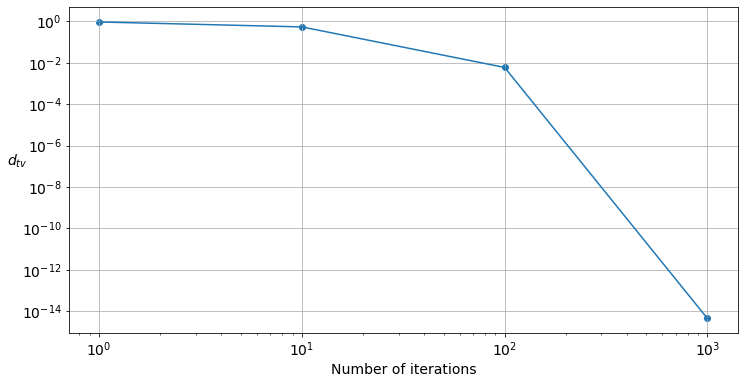

In [268]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(powers, diff)
ax.scatter(powers, diff)
ax.grid(True)
ax.set_xscale('log'), ax.set_yscale('log')
ax.set_xlabel('Number of iterations'), ax.set_ylabel('$d_{tv}$', rotation=0)

fig.savefig(filename, bbox_inches='tight')